1. What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.
   - Deep learning is a specialized branch of machine learning that enables computers to learn and make decisions by using multilayered neural networks inspired by the structure and functioning of the human brain. It evolved from early neural network research that began decades ago but remained limited due to insufficient data and computational power. With the rise of big data, faster processors like GPUs, and improved training algorithms in the last decade, deep learning became practical and highly effective for complex tasks. Unlike traditional machine learning, which relies heavily on manually engineered features and simpler models, deep learning automatically extracts features from raw data through multiple layers of processing. This allows it to handle large scale, complex, and unstructured data such as images, audio, and text more efficiently, making it significantly more powerful for advanced applications compared to traditional machine learning approaches.

2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?
    - A perceptron is the most basic type of artificial neural network and is considered the foundation of more advanced neural models. Its architecture includes input values, each connected with a weight, along with a bias term, a summation unit, and an activation function. In its functioning, the perceptron receives input signals, multiplies each input by its corresponding weight, adds them together with the bias, and then passes the result through an activation function, usually a step function, to produce a binary output. During training, the perceptron adjusts its weights based on errors in prediction, gradually learning how to correctly classify the input data. However, the perceptron has important limitations it can only solve linearly separable problems and fails when dealing with more complex patterns, such as the XOR problem. It also cannot handle non-linear decision boundaries or complex real world tasks on its own, which is why single perceptrons are replaced by multilayer neural networks in practical applications.


3. Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.
   - The activation function in a neural network is used to introduce non linearity into the model, enabling it to learn complex and meaningful patterns from data rather than just simple linear relationships. It determines whether a neuron should be activated by transforming the weighted sum of inputs into an output that is passed to the next layer, which is essential for the network’s learning capability. Common activation functions include Sigmoid, Tanh, and ReLU, each with its own characteristics. The Sigmoid function maps values between 0 and 1 and is often used in binary classification, but it suffers from the vanishing gradient problem, making training slow in deep networks. The Tanh function outputs values between −1 and 1, which helps center the data and usually performs better than Sigmoid, though it still faces vanishing gradient issues. ReLU, or Rectified Linear Unit, outputs zero for negative inputs and a positive linear value for positive inputs, making it computationally efficient and effective for deep networks, which is why it is widely used today, despite the risk of inactive or “dead” neurons.


4. What is the difference between Loss function and Cost function in neural
networks? Provide examples.
   - In neural networks, the loss function and the cost function are closely related concepts, but they differ mainly in how the error is measured and applied during training. A loss function calculates the error for a single training example by measuring the difference between the predicted output and the actual target value. It helps the model understand how wrong its prediction is for that specific data point. Common examples of loss functions include Mean Squared Error (MSE) for regression problems and Binary Cross Entropy for binary classification tasks. On the other hand, a cost function represents the overall error of the model across the entire training dataset or a batch of data. It is usually computed as the average or sum of the individual loss values and provides a single value that reflects the model’s overall performance. For example, the cost function in linear regression is often the average of the Mean Squared Errors across all training samples, while in classification tasks, it can be the average cross entropy loss.

5. What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.
   - Optimizers play a vital role in neural networks by controlling how the model’s weights and biases are updated during training in order to minimize the loss or cost function. They determine the direction and size of the steps taken while moving toward the optimal solution, directly affecting how fast and how well the network learns. Gradient Descent is the most basic optimizer, which updates parameters by moving in the opposite direction of the gradient of the loss function, while it is simple and effective, it can be slow and sensitive to the choice of learning rate, especially for large datasets. RMSprop improves upon basic gradient descent by adapting the learning rate for each parameter based on the recent magnitudes of gradients, helping the model converge faster and handle non stationary problems. Adam combines the advantages of both momentum and RMSprop by using running averages of both gradients and squared gradients, making it efficient, robust, and widely used in practice. As a result, while Gradient Descent is useful for understanding the fundamentals, Adam and RMSprop are generally preferred for training deep neural networks due to their faster convergence and better stability.


In [1]:
# 6. Write a Python program to implement a single-layer perceptron from
# scratch using NumPy to solve the logical AND gate.
# (Include your Python code and output in the code box below.)

import numpy as np

# Define input data for AND gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected outputs
y = np.array([0, 0, 0, 1])

#Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# Activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Train the perceptron
for a in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)
        error = y[i] - y_pred

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Test the perceptron
print("Final Weights:", weights)
print("Final Bias:", bias)
print("\nAND Gate Predictions:")

for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]} -> Output: {output}")


Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004

AND Gate Predictions:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 0
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 1


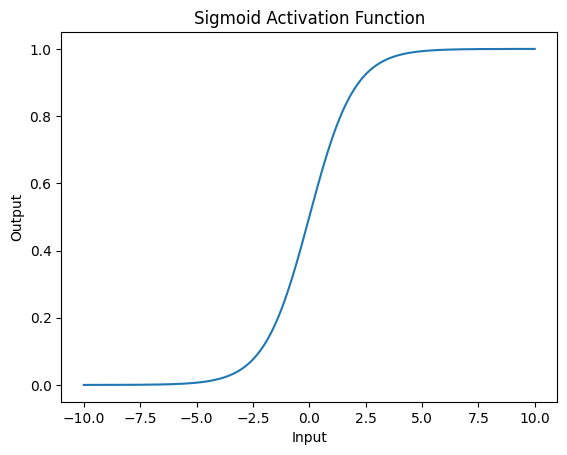

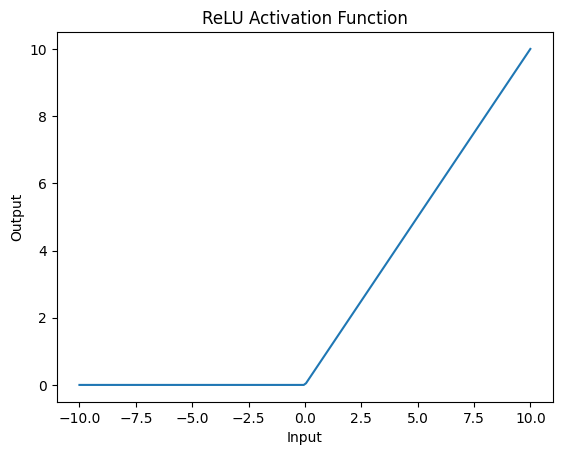

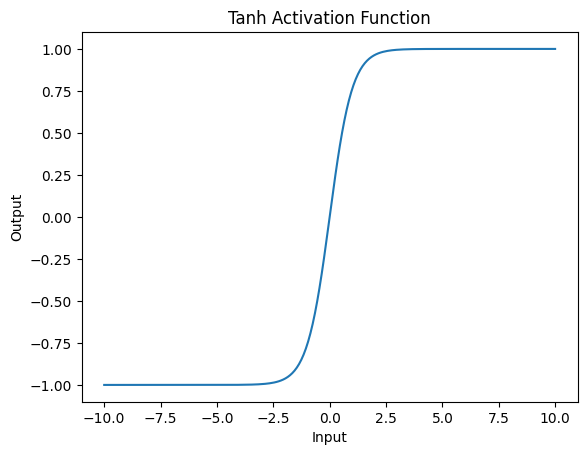

In [2]:
# 7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions
# using Matplotlib.
# (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt

# Create input range
x = np.linspace(-10, 10, 200)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot Sigmoid
plt.figure()
plt.plot(x, y_sigmoid)
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Plot ReLU
plt.figure()
plt.plot(x, y_relu)
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Plot Tanh
plt.figure()
plt.plot(x, y_tanh)
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


In [5]:
# 8. Use Keras to build and train a simple multilayer neural network on the
# MNIST digits dataset. Print the training accuracy.
# (Include your Python code and output in the code box below.)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the multilayer neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    verbose=1
)

# Print training accuracy
training_accuracy = history.history['accuracy'][-1]
print("Training Accuracy:", training_accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8763 - loss: 0.4252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9676 - loss: 0.1073
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9782 - loss: 0.0702
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0488
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0387
Training Accuracy: 0.9863166809082031


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7834 - loss: 0.6215 - val_accuracy: 0.8547 - val_loss: 0.3989
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.3688 - val_accuracy: 0.8629 - val_loss: 0.3819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8765 - loss: 0.3355 - val_accuracy: 0.8674 - val_loss: 0.3682
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8853 - loss: 0.3071 - val_accuracy: 0.8683 - val_loss: 0.3664
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8893 - loss: 0.2932 - val_accuracy: 0.8668 - val_loss: 0.3693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8974 - loss: 0.2715 - val_accuracy: 0.8766 - val_loss: 0.3435
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9016 - loss: 0.2627 - val_accuracy: 0.8811 - val_loss: 0.3408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9065 - loss: 0.2522 -

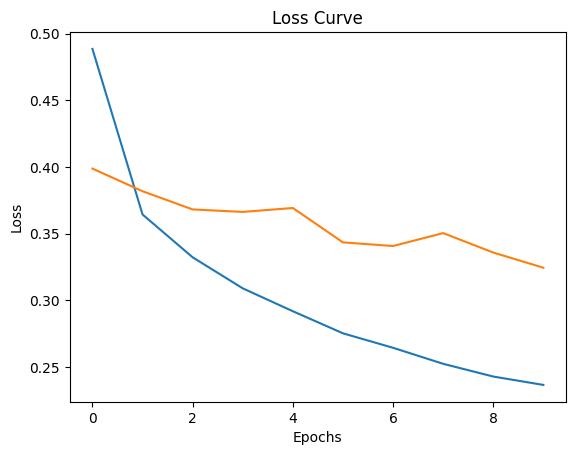

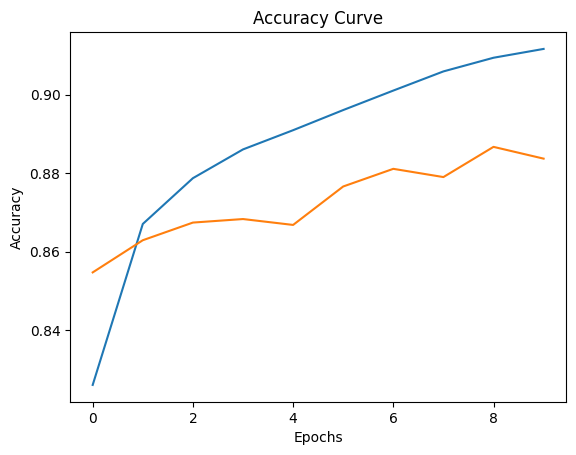

In [6]:
# 9. Visualize the loss and accuracy curves for a neural network model trained
# on the Fashion MNIST dataset. Interpret the training behavior.
# (Include your Python code and output in the code box below.)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

# Plot Training and Validation Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Plot Training and Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


10. You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:

- i. How would you design a deep learning model (perceptron or multilayer NN)?
   - For designing a deep learning model to detect fraudulent transactions, I would go for a multilayer neural network (MLP) rather than a simple perceptron. This is because the dataset contains structured features like transaction amount, merchant ID, and customer location, and fraud patterns are often complex and non linear. A multilayer network with a few hidden layers can capture these subtle patterns and relationships between features better than a single layer perceptron, which can only handle linearly separable data. The input layer would match the number of features, and the hidden layers would progressively reduce in size, helping the network learn meaningful hierarchical representations.

- ii.  Which activation function and loss function would you use, and why?
  - For the activation and loss functions, I would use ReLU for the hidden layers because it trains efficiently, avoids vanishing gradients, and allows the network to learn faster. For the output layer, Sigmoid would be ideal since it produces a probability between 0 and 1, which aligns perfectly with the binary classification problem of fraud vs. legitimate transactions. The Binary Cross Entropy loss function would be used because it effectively measures the difference between predicted probabilities and actual class labels, guiding the network to minimize classification errors.

- iii. How would you train and evaluate the model, considering class imbalance?
   - Training and evaluation need to be handled carefully due to class imbalance, as fraudulent transactions are rare compared to legitimate ones. I would apply class weights so that the model pays more attention to the minority (fraud) class. In addition, I would monitor metrics like precision, recall, F1 score, and ROC AUC, rather than relying solely on accuracy, which can be misleading in imbalanced datasets. Techniques like oversampling the minority class or undersampling the majority class could also be considered to help the model learn better.

- iv  Which optimizer would be suitable, and how would you prevent overfitting?
   -  For the optimizer, I would choose Adam because it adapts the learning rate for each parameter automatically, making it faster and more stable for deep networks. To prevent overfitting, I would include Dropout layers in the hidden layers, which randomly deactivate some neurons during training, and apply early stopping so that training halts once the validation loss stops improving. Additionally, L2 regularization could be used to penalize large weights and further improve generalization.

In [8]:


import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score

# let's simulate a dataset
np.random.seed(0)
X = np.random.rand(1000, 10)
y = np.random.choice([0, 1], size=1000)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5136 - loss: 0.7050 - val_accuracy: 0.4875 - val_loss: 0.6997
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5605 - loss: 0.6906 - val_accuracy: 0.5188 - val_loss: 0.6958
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5677 - loss: 0.6851 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5521 - loss: 0.6847 - val_accuracy: 0.5437 - val_loss: 0.6908
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5891 - loss: 0.6816 - val_accuracy: 0.5562 - val_loss: 0.6906
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5713 - loss: 0.6777 - val_accuracy: 0.5375 - val_loss: 0.6886
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5954 - loss: 0.6749 - val_accuracy: 0.5625 - val_loss: 0.6874
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5829 - loss: 0.6753 - val_accuracy: 0.5500 - val_loss: 0.